# Exploratory Data Analysis 

Exploratory data analysis (EDA) is one of the most important components to any data science experiment. It's "a first look" at our dataset and is used to understand and summarize the content of our dataset by selecting the features in which we later feed into our machine learning algorithms. 

EDA generally is classified into two methods, non-graphical and graphical. Each method can be applied to one variable/column (univariate) or a combination of variables/columns (bivariate).

It is also good practice to understand the problem statement and dataset prior to diving neck deep into EDA, 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

plt.style.use('ggplot')

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2




List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


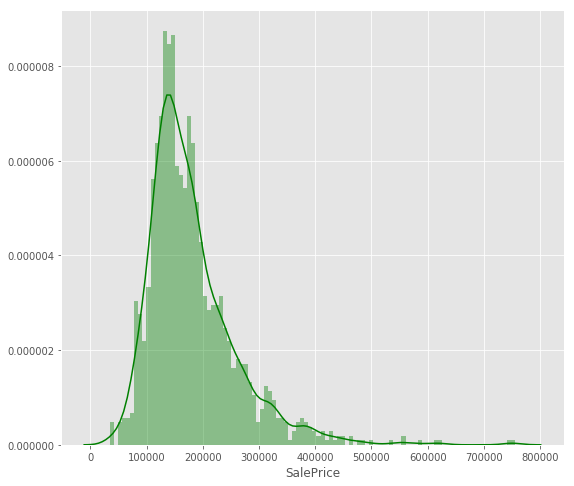

In [5]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

#### Numerical Data distribution 

Below we will look at the distribution of all the features by plotting them. 

We will start by discorving our data types from our dataset and only use the numerical ones i.e. intergers and float. 

In [6]:
list(set(df.dtypes))

[dtype('int64'), dtype('O'), dtype('float64')]

Here we are separating numerical and object/string data types in order to look at the distribution of the numerical data points

In [7]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

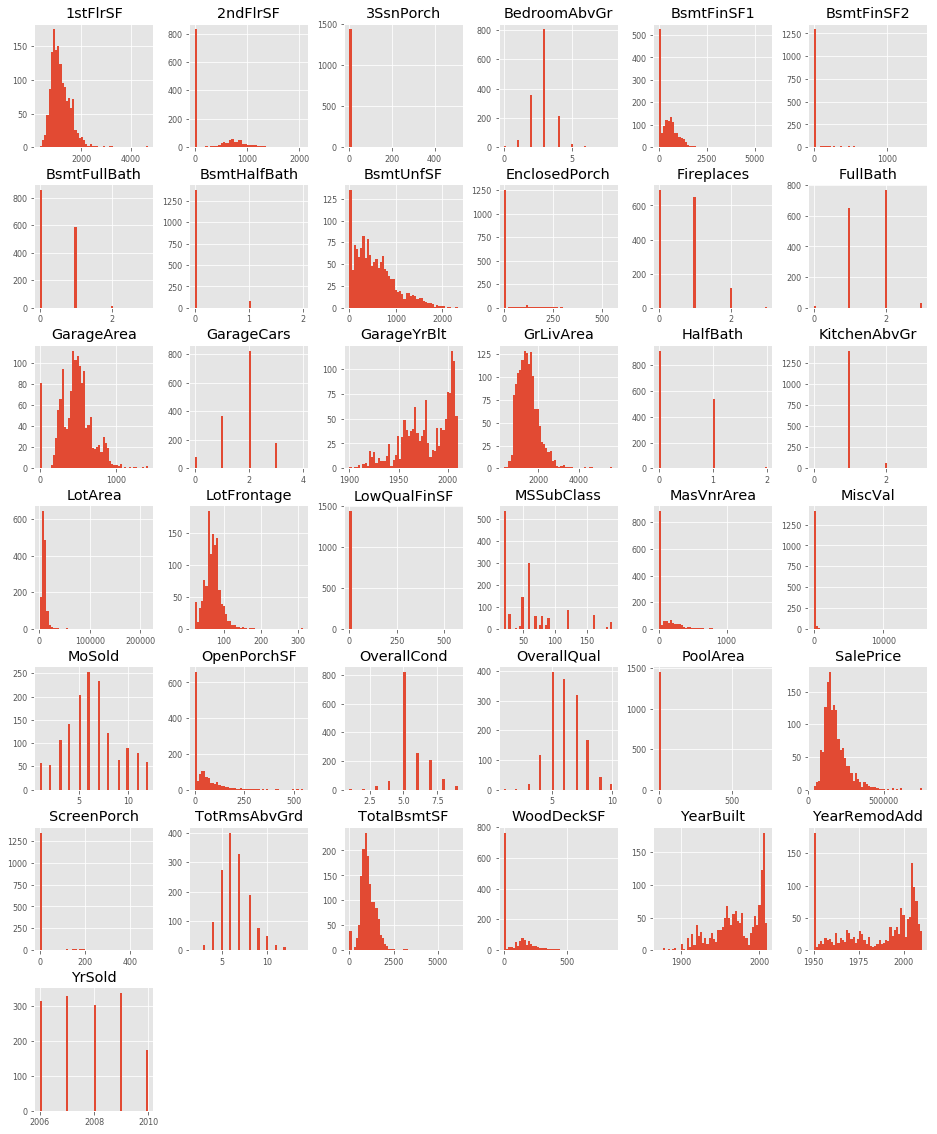

In [8]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlation 
Here we'll try to find features that are strongly correlated with salesprice. We are storing it under "golden_features_list" and take only features that have greater than 0.50 

In [9]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Correlation is affected by outliers, so we need to advance to the next step: 
- Plot numerical features and see which ones have very few or explainable outliers
- Remove the outliers from these features and see which one can have a good correlation without their outliers 

Correlation by itself does not always explain the relationship between data, so plotting the could lead to new insights and in the same manner. 

Let's check if our correlated values have a linear relationship to "SalePrice" or our target. 

Relationships usch as curvillinear  relationship cannot be guessed just by looking at the correlation value, so lets take the features we excluded from our correlation table and plot them to see if the show some kind of pattern.

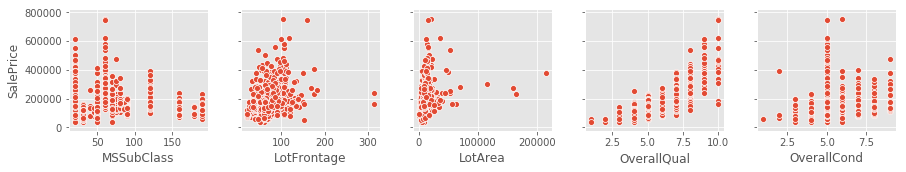

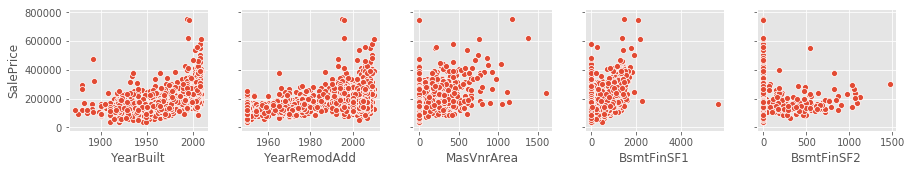

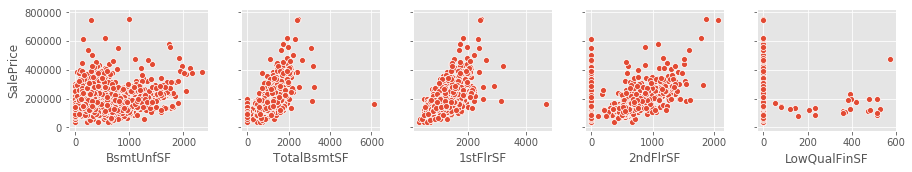

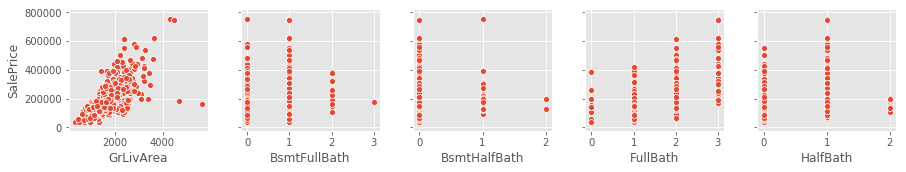

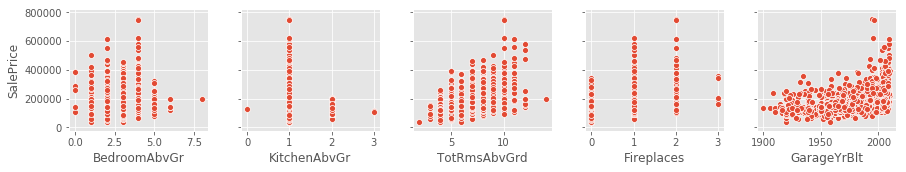

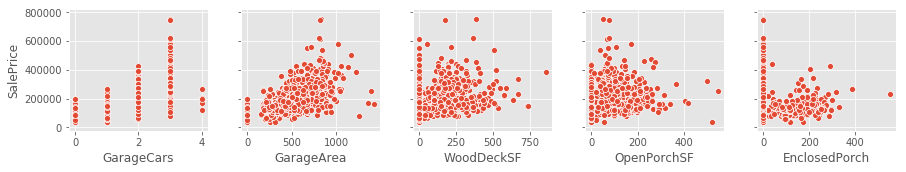

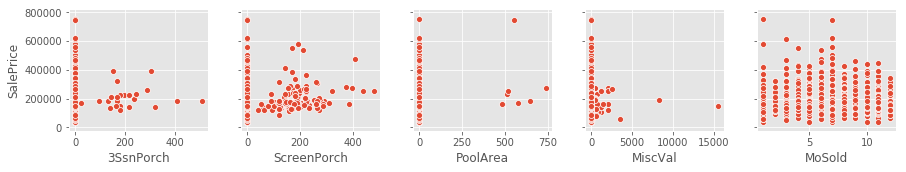

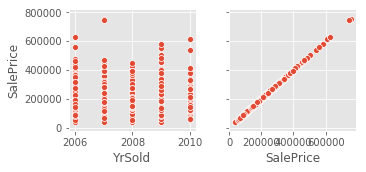

In [10]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, 
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

We can identify some relationships, most of them have a linear realtionship with the "SalePrice" and if we look closely at the data, we see that there are a lot of zeros, which may indicate the abscence of such feature in the house.

So let's remove these zero values and repeat the process of finding correlated values: 

In [11]:
import operator 

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

In [12]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


We found strongly correlated predictors with 'SalesPrice'. During the feature engineering, we may add dummy values where value of a given feature > 0 would be 1 and 0 would be 0.  

By looking at correlation between numerical values, we discovered 11 features which have a strong relationship to house price. 


#### Feature to feature relationship 

Below we are visually checking feature to feature relationship and selecting features that are correlated greater than 50% and are negatively correlated less than 40%. 

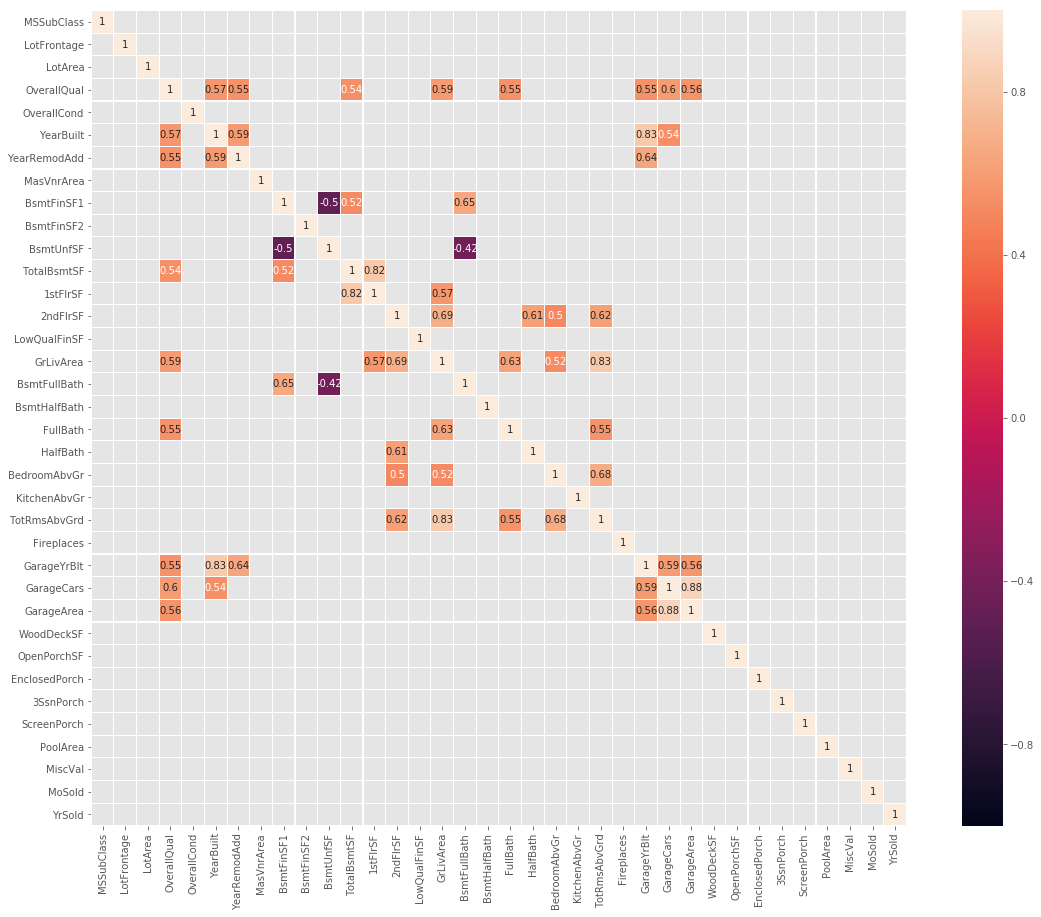

In [14]:
features = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(20, 15))

sns.heatmap(features[(features >=.5) | (features <= -.4)], 
           vmax=1, vmin=-1, annot=True, square=True, linewidths=0.1)

Most of the features seems to correlated between each other. Some of the ones that stand out are; 1) YearBuild & GarageYrBlt, which may indicate price inflation throughout the years. 2) GrLivArea & TotRmsAbvGrd, makes sense because the living area tends to be on the main floor. 3) 1stFlrSF & TotalBsmtSF, its normal that the larger the 1st floor the more total square footage the basement will be. 

HalfBath & 2ndFlrSF seems to have an interesting relationship, this may indicate that people gives an importance in not having to go downstairs to go to the bathroom. 

Highly correlated features may be combined to reduce the number of features. 

#### Quantitative to Quantitative relationship

Let's checkout the quantitative features and how they relate to our target, "SalesPrice",  which is also quantitative. [source](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python) 

First, we need to separate our categorical from our numerical/quantitative features. 

In [15]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                              'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF','2ndFlrSF', 
                              'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                              'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr', 
                              'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
                              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                              'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


To make things easier, let's take the strongly correlated features 

In [16]:
features_eda = [x for x in quantitative_features_list if x in golden_features_list]
features_eda.append('SalePrice')
features_eda

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


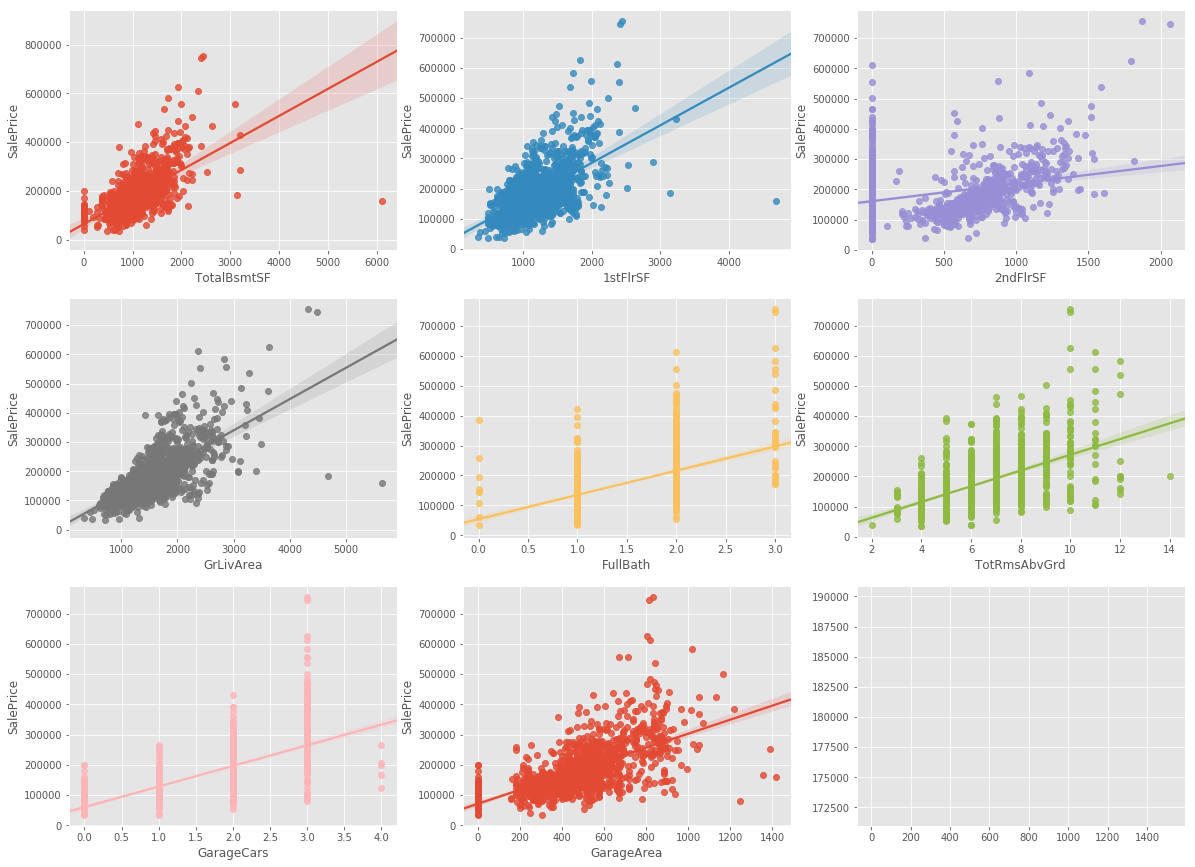

In [17]:
#looking at distribution 

fig, ax = plt.subplots(round(len(features_eda) / 3), 3, figsize=(20,15))

for i, ax in enumerate(fig.axes): 
    if i < len(features_eda) -1: 
        sns.regplot(x=features_eda[i], y='SalePrice', data=df[features_eda], ax=ax)

We can see that there is a linear relationship between these features against SalePrice. We also observe outliers within our dataset which needs to be dealt with prior to feeding our dataset to a model. Another noticeable pattern, GarageCars, FullBath, TotRmsAbvGrd, eventhough there considered numerical, it seems to belong in the categorical section. 

#### Categorical to Quantitative relationship

First, we need to separate all the categorical features. 

In [18]:
''' since we've already selected our numerical features, 
we'll use that to formulate our new variable

the [:-1] is to leave out "SalePrice" '''

categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [20]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n\n{}'
      .format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Let's plot a few of them 

Text(0, 0.5, 'SalePrice')

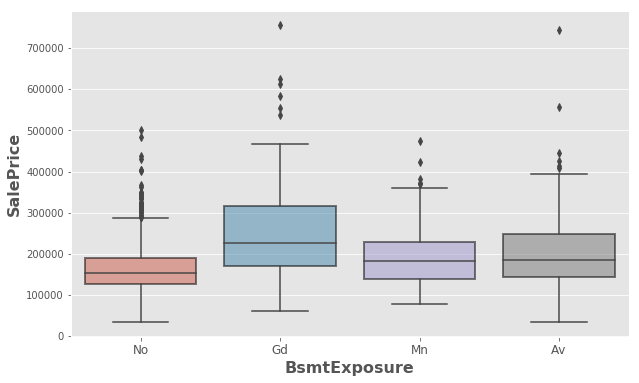

In [34]:
plt.figure(figsize = (10, 6))
x = 'BsmtExposure'
y = 'SalePrice'

ax = sns.boxplot(x=x, y=y, data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=None, fontsize=12)
plt.xlabel(x, fontsize=16, fontweight='bold')
plt.ylabel(y, fontsize=16, fontweight='bold')

Text(0, 0.5, 'SalePrice')

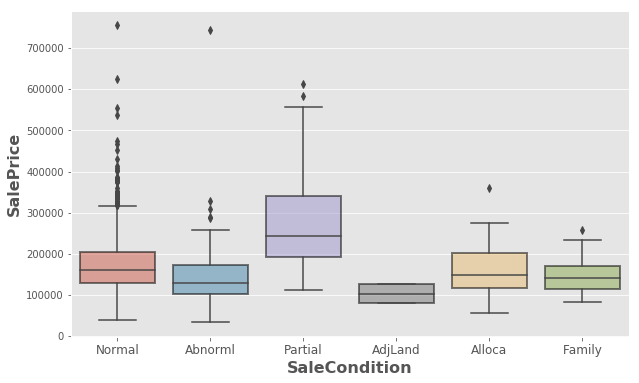

In [35]:
plt.figure(figsize = (10, 6))
x = 'SaleCondition'
y = 'SalePrice'

ax = sns.boxplot(x=x, y=y, data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=None, fontsize=12)
plt.xlabel(x, fontsize=16, fontweight='bold')
plt.ylabel(y, fontsize=16, fontweight='bold')

Text(0, 0.5, 'SalePrice')

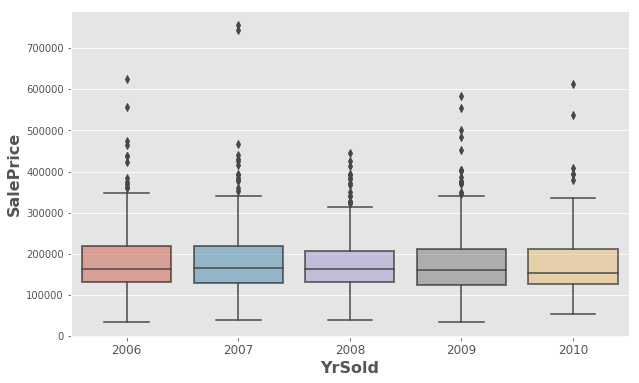

In [36]:
plt.figure(figsize = (10, 6))
x = 'YrSold'
y = 'SalePrice'

ax = sns.boxplot(x=x, y=y, data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=None, fontsize=12)
plt.xlabel(x, fontsize=16, fontweight='bold')
plt.ylabel(y, fontsize=16, fontweight='bold')

Text(0, 0.5, 'SalePrice')

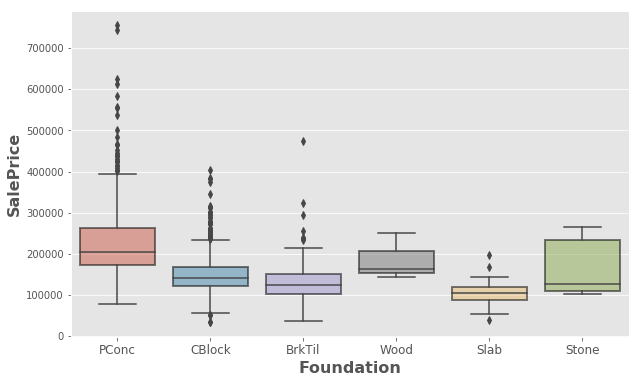

In [37]:
plt.figure(figsize = (10, 6))
x = 'Foundation'
y = 'SalePrice'

ax = sns.boxplot(x=x, y=y, data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=None, fontsize=12)
plt.xlabel(x, fontsize=16, fontweight='bold')
plt.ylabel(y, fontsize=16, fontweight='bold')

Let's take a look at their distribution 

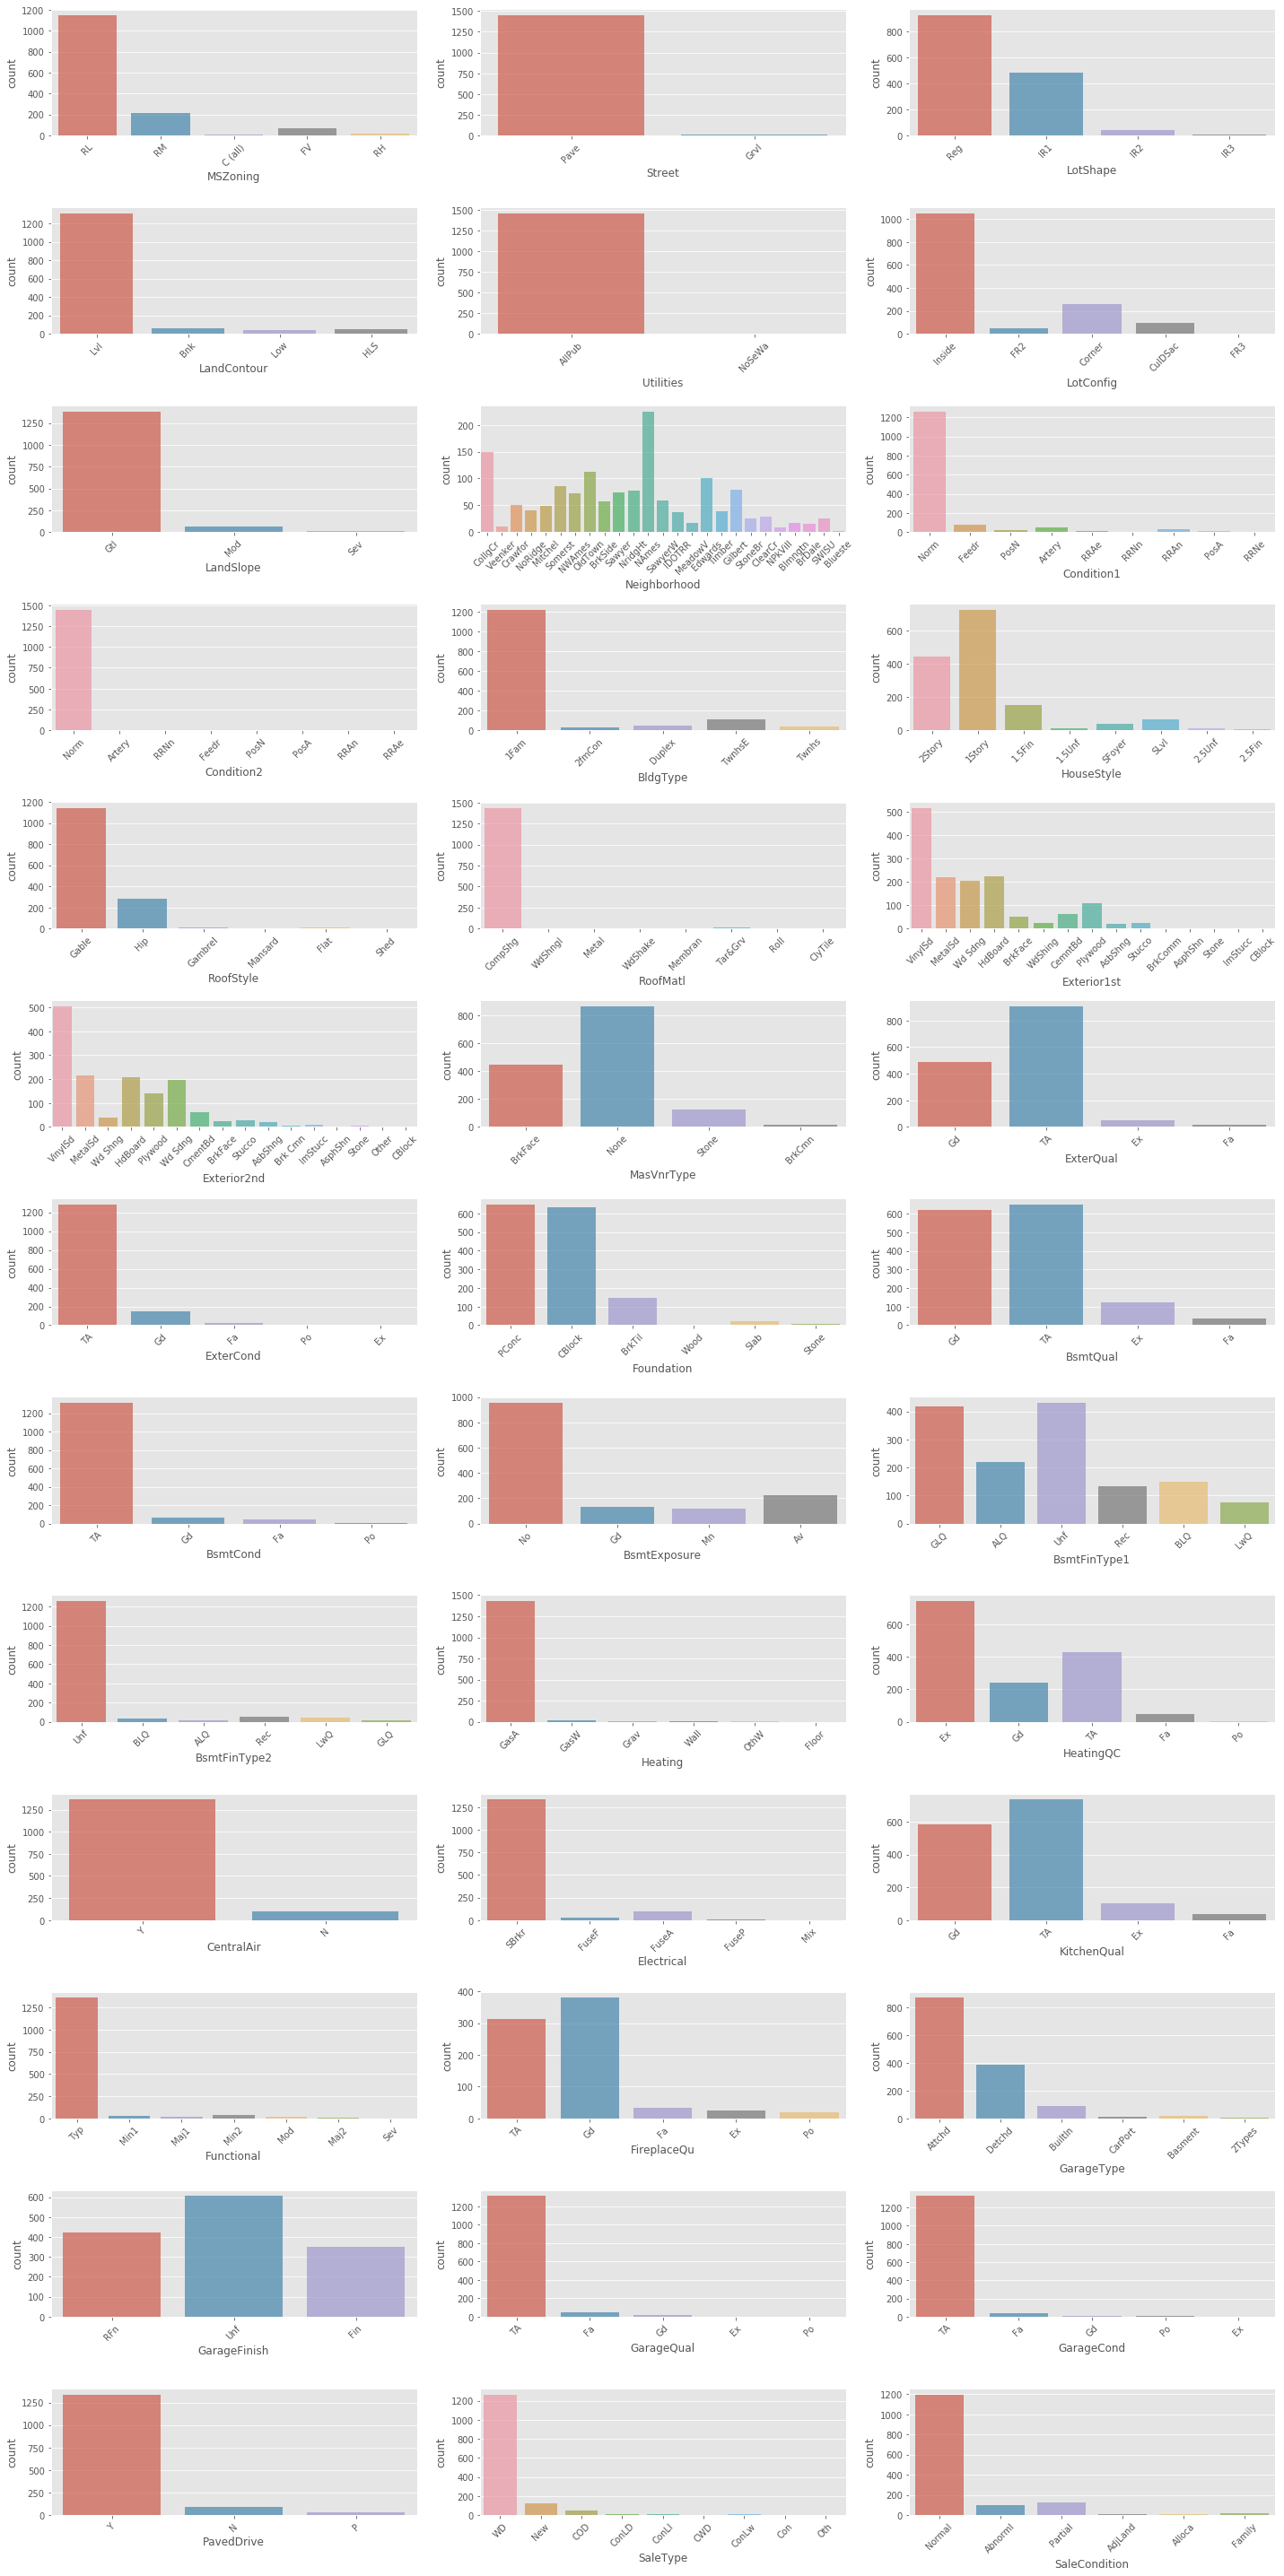

In [38]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(20, 40))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

We can conclude that some of the categories (Utilities, CentralAir, Street, GarageCond, and other) are skewed tremendously and will hinder our predictive modeling, therefore we will consider dropping these features prior to modeling. 

I'd like to thank Kaggle and [Tuatini](https://www.kaggle.com/ekami66) for this [Detailed EDA](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python) codealong.  

# Faster EDA with Pandas-Profiling 

Below we will import our necessary packages. Then we will run a single line of to create a HTML EDA report of you dataset. The first part will contain an overview, providing basic information under "Dataset info". It will also provide a list of "Warnings", showing missing values and zeros. Also, "Variable types", where it defines variable types within your dataset.


In [39]:
#import necessary packages 

import pandas as pd 
import numpy as np 
import pandas_profiling 

In [44]:
#single line of code to provide EDA report 
pandas_profiling.ProfileReport(df, check_correlation=False)

Number of variables,76
Number of observations,1460
Total Missing (%),1.4%
Total size in memory,867.0 KiB
Average record size in memory,608.1 B
Numeric,37
Categorical,39
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Note: the Correlation section is not showing due to the number of columns or fields (76) are greater than program threshold. 